# **Pendahuluan**

Pergerakan suatu objek yang ditembakkan dari ketinggian tertentu dapat didekati dengan menggunakan konsep gerak peluru. Adapun ilustrasi gerak peluru ditunjukkan pada Gambar 1. Pada kajian yang sederhana, pergerakan objek pada gerak peluru dapat dihitung dengan mengabaikan hambatan udara. Untuk kasus tersebut, percepatan gravitasi pada sumbu $x$ dan $y$ diformulasikan oleh persamaan (1) dan (2), dimana $g$ adalah percepatan gravitasi yang nilainya $9.806 m/s^2$.



$a_x = 0$

$a_y = -g$




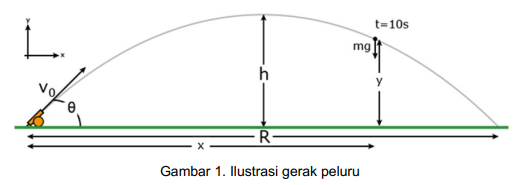

Dengan menggunakan nilai percepatan tersebut, posisi objek dan kecepatan dapat
dihitung secara numerik, sebagaimana ditunjukkan pada persamaan (3) (6), dimana $∆t$ merepresentasikan time step. Adapun kecepatan awal pada sumbu $x$ dan $y$ dihitung dengan menggunakan persamaan (7) dan (8), dimana $\alpha$ merepresentasikan sudut
tembak.

$\begin{gathered}x(t+\Delta t)=x(t)+v_x(t+\Delta t) \Delta t
\\ y(t+\Delta t)=y(t)+v_y(t+\Delta t) \Delta t
\\ v_x(t+\Delta t)=v_x(t)+a_x \Delta t
\\ v_y(t+\Delta t)=v_y(t)+a_y \Delta t
\\ v_x(0)=v(0) \cos \alpha \\ v_y(0)=v(0) \sin \alpha\end{gathered}$

Pada kasus yang lebih riil, simulasi gerak peluru perlu mempertimbangkan faktor hambatan udara yang mempengaruhi pergerakan objek. Secara umum, perhitungan posisi objek pada gerak peluru dengan mengabaikan atau mempertimbangkan hambatan
udara adalah sama. Perbedaan utama untuk kedua kasus tersebut hanyalah ekspresi yang digunakan pada percepatan sumbu $x$ dan $y$. Untuk kasus kedua, percepatan gravitasi pada sumbu $x$ dan $y$ diformulasikan oleh persamaan (11) dan (13), dimana $D$ dan $m$ berturut-turut merepresentasikan konstanta hambatan dan massa objek.


$\begin{gathered}a_x(t+\Delta t)=-\left(\frac{D}{m}\right) v(t) v_x(t)
\\ a_y(t+\Delta t)=-g-(D / m) v(t) v_y(t)
\\ v(t)=\sqrt{v_x(t)^2+v_y(t)^2}\end{gathered}$

# **Tugas**

Suatu objek dengan massa $0.15 kg$ ditembakkan dari permukaan tanah dengan kecepatan awal $50 m/s$ dan sudut tembak $35^o$. Dengan menggunakan nilai $D = 0.0013$ dan $∆t = 0.01$,

1. Hitung posisi objek sejak ditembakkan hingga sampai ke permukaan tanah dengan **mengabaikan** hambatan udara.

2. Hitung posisi objek sejak ditembakkan hingga sampai ke permukaan tanah dengan **mempertimbangkan** hambatan udara.

3. Hitung tinggi maksimum dan $(h)$ dan jarak tembak $(R)$ objek untuk kedua pendekatan tersebut.

# **Hasil Pengerjaan**

Suatu objek dengan massa $0.15 kg$ ditembakkan dari permukaan tanah dengan kecepatan awal 50 m/s dan sudut tembak $35^o$. Dengan menggunakan nilai $D = 0.0013$ dan $∆t = 0.01$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Nomor 1:** Gerak Peluru Tanpa Hambatan Udara

In [ ]:
def object_position1(v0, angle, delta_t):
    g = 9.806
    angle_rad = np.radians(angle)     # Konversi sudut ke radian

    # Kecepatan awal
    v0x = v0 * np.cos(angle_rad)      # Persamaan (7)
    v0y = v0 * np.sin(angle_rad)      # Persamaan (8)

    # Waktu terbang total
    t_flight = 2 * v0y / g

    # Titik-titik waktu
    t = np.arange(0, t_flight, delta_t)
    if t[-1] < t_flight:
        t = np.append(t, t_flight)

    # Inisialisasi array posisi dan kecepatan
    x   = np.zeros(len(t))
    y   = np.zeros(len(t))
    vx  = np.full(len(t), v0x)
    vy  = np.zeros(len(t))
    vy[0] = v0y

    for i in range(1, len(t)):
        vy[i] = vy[i-1] - g * delta_t      # Persamaan (6)
        x[i] = x[i-1] + vx[i-1] * delta_t  # Persamaan (3)
        y[i] = y[i-1] + vy[i-1] * delta_t  # Persamaan (4)

        # Kondisi jika objek mencapai tanah (y=0), hentikan loop
        if y[i] <= 0:
            break

    return t, x, y

In [ ]:
# Parameter Definition
v0      = 50     # Kecepatan awal (m/s)
angle   = 35     # Sudut luncuran (derajat)
delta_t = 0.01   # Langkah waktu (s)

# Menghitung posisi tanpa hambatan udara
t_no_air, x_no_air, y_no_air = object_position1(v0, angle, delta_t)

In [ ]:
# Menampilkan posisi peluru
print("Posisi objek:")

for i, (x_pos, y_pos) in enumerate(zip(x_no_air, y_no_air)):
    print(f"Waktu: {i * delta_t:.2f} s, X: {x_pos:.2f} m, Y: {y_pos:.2f} m")

Posisi objek:
Waktu: 0.00 s, X: 0.00 m, Y: 0.00 m
Waktu: 0.01 s, X: 0.41 m, Y: 0.29 m
Waktu: 0.02 s, X: 0.82 m, Y: 0.57 m
Waktu: 0.03 s, X: 1.23 m, Y: 0.86 m
Waktu: 0.04 s, X: 1.64 m, Y: 1.14 m
Waktu: 0.05 s, X: 2.05 m, Y: 1.42 m
Waktu: 0.06 s, X: 2.46 m, Y: 1.71 m
Waktu: 0.07 s, X: 2.87 m, Y: 1.99 m
Waktu: 0.08 s, X: 3.28 m, Y: 2.27 m
Waktu: 0.09 s, X: 3.69 m, Y: 2.55 m
Waktu: 0.10 s, X: 4.10 m, Y: 2.82 m
Waktu: 0.11 s, X: 4.51 m, Y: 3.10 m
Waktu: 0.12 s, X: 4.91 m, Y: 3.38 m
Waktu: 0.13 s, X: 5.32 m, Y: 3.65 m
Waktu: 0.14 s, X: 5.73 m, Y: 3.93 m
Waktu: 0.15 s, X: 6.14 m, Y: 4.20 m
Waktu: 0.16 s, X: 6.55 m, Y: 4.47 m
Waktu: 0.17 s, X: 6.96 m, Y: 4.74 m
Waktu: 0.18 s, X: 7.37 m, Y: 5.01 m
Waktu: 0.19 s, X: 7.78 m, Y: 5.28 m
Waktu: 0.20 s, X: 8.19 m, Y: 5.55 m
Waktu: 0.21 s, X: 8.60 m, Y: 5.82 m
Waktu: 0.22 s, X: 9.01 m, Y: 6.08 m
Waktu: 0.23 s, X: 9.42 m, Y: 6.35 m
Waktu: 0.24 s, X: 9.83 m, Y: 6.61 m
Waktu: 0.25 s, X: 10.24 m, Y: 6.88 m
Waktu: 0.26 s, X: 10.65 m, Y: 7.14 m
Waktu: 0.27 

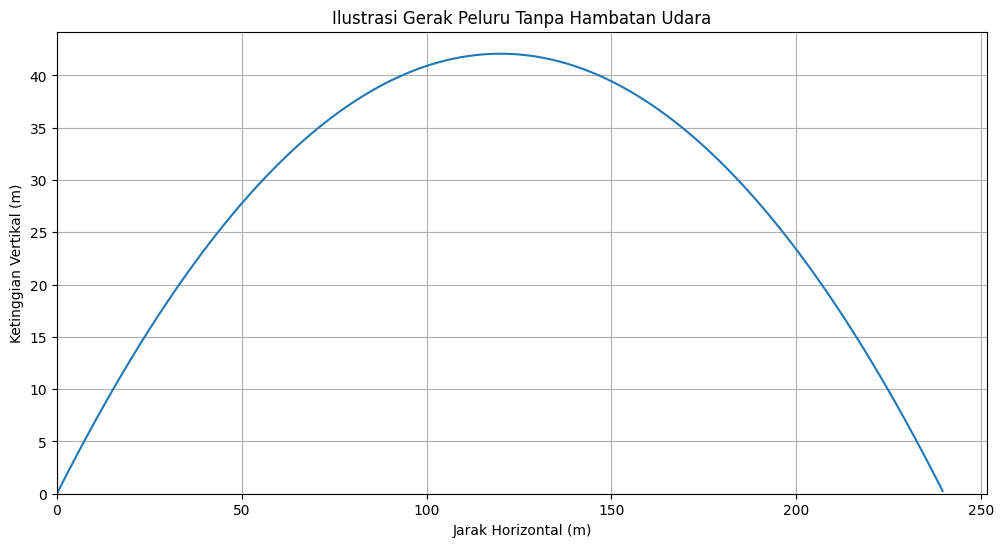

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x_no_air, y_no_air)
plt.title('Ilustrasi Gerak Peluru Tanpa Hambatan Udara')
plt.xlabel('Jarak Horizontal (m)')
plt.ylabel('Ketinggian Vertikal (m)')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(True)
plt.show()

In [ ]:
data = {
    "Waktu (s)": [i * delta_t for i in range(len(x_no_air))],
    "Posisi X (m)": x_no_air,
    "Posisi Y (m)": y_no_air
}

df1 = pd.DataFrame(data)
df1.to_excel("posisi_objek_1.xlsx", index=False)
df1

,Waktu (s),Posisi X (m),Posisi Y (m)
0,0.00,0.000000,0.000000
1,0.01,0.409576,0.286788
2,0.02,0.819152,0.572596
3,0.03,1.228728,0.857423
4,0.04,1.638304,1.141269
...,...,...,...
581,5.81,237.963669,1.402661
582,5.82,238.373245,1.119720
583,5.83,238.782821,0.835799
584,5.84,239.192397,0.550898


**Nomor 2:** Gerakan Proyektil Dengan Hambatan Udara

In [ ]:
def object_position2(v0, angle, massa, D, delta_t):
    g = 9.806
    angle_rad = np.radians(angle)

    # Kecepatan awal
    v0x = v0 * np.cos(angle_rad)      # Persamaan (7)
    v0y = v0 * np.sin(angle_rad)      # Persamaan (8)

    # Inisialisasi variabel
    x, y   = [0], [0]
    vx, vy = [v0x], [v0y]

    # Kondisi jika objek belum mencapai tanah
    while True:

        # Kecepatan saat ini
        v = np.sqrt(vx[-1]**2 + vy[-1]**2)        # Persamaan (13)

        # Gaya hambatan
        f_drag = (D / massa) * v

        # Percepatan
        ax = -f_drag * (vx[-1])                   # Persamaan (11)
        ay = -g - (f_drag * (vy[-1]))             # Persamaan (12)

        # Update kecepatan
        vx.append(vx[-1] + ax * delta_t)          # Persamaan (5)
        vy.append(vy[-1] + ay * delta_t)          # Persamaan (6)

        # Update posisi
        x_new = x[-1] + vx[-1] * delta_t          # Persamaan (3)
        y_new = y[-1] + vy[-1] * delta_t          # Persamaan (4)

        # Kondisi jika objek mencapai tanah (y=0), hentikan loop
        if y_new <= 0:
            break

        x.append(x_new)
        y.append(y_new)

    return x, y

In [ ]:
# Parameter Definition
v0      = 50      # Kecepatan awal (m/s)
angle   = 35      # Sudut luncuran (derajat)
delta_t = 0.01    # Langkah waktu (s)
massa   = 0.15    # Massa (kg)
D       = 0.0013  # Konstanta hambatan udara

# Menghitung posisi dengan hambatan udara
x_air, y_air = object_position2(v0, angle, massa, D, delta_t)

In [ ]:
print("Posisi objek:")

for i in range(len(x_air)):
    print(f"Waktu: {i * delta_t:.2f} s, X: {x_air[i]:.2f} m, Y: {y_air[i]:.2f} m")

Posisi objek:
Waktu: 0.00 s, X: 0.00 m, Y: 0.00 m
Waktu: 0.01 s, X: 0.41 m, Y: 0.28 m
Waktu: 0.02 s, X: 0.81 m, Y: 0.57 m
Waktu: 0.03 s, X: 1.22 m, Y: 0.85 m
Waktu: 0.04 s, X: 1.62 m, Y: 1.13 m
Waktu: 0.05 s, X: 2.02 m, Y: 1.40 m
Waktu: 0.06 s, X: 2.42 m, Y: 1.67 m
Waktu: 0.07 s, X: 2.82 m, Y: 1.95 m
Waktu: 0.08 s, X: 3.21 m, Y: 2.22 m
Waktu: 0.09 s, X: 3.61 m, Y: 2.48 m
Waktu: 0.10 s, X: 4.00 m, Y: 2.75 m
Waktu: 0.11 s, X: 4.39 m, Y: 3.01 m
Waktu: 0.12 s, X: 4.78 m, Y: 3.27 m
Waktu: 0.13 s, X: 5.17 m, Y: 3.53 m
Waktu: 0.14 s, X: 5.56 m, Y: 3.79 m
Waktu: 0.15 s, X: 5.94 m, Y: 4.04 m
Waktu: 0.16 s, X: 6.32 m, Y: 4.30 m
Waktu: 0.17 s, X: 6.70 m, Y: 4.55 m
Waktu: 0.18 s, X: 7.08 m, Y: 4.80 m
Waktu: 0.19 s, X: 7.46 m, Y: 5.04 m
Waktu: 0.20 s, X: 7.84 m, Y: 5.29 m
Waktu: 0.21 s, X: 8.22 m, Y: 5.53 m
Waktu: 0.22 s, X: 8.59 m, Y: 5.77 m
Waktu: 0.23 s, X: 8.96 m, Y: 6.01 m
Waktu: 0.24 s, X: 9.33 m, Y: 6.25 m
Waktu: 0.25 s, X: 9.70 m, Y: 6.49 m
Waktu: 0.26 s, X: 10.07 m, Y: 6.72 m
Waktu: 0.27 s

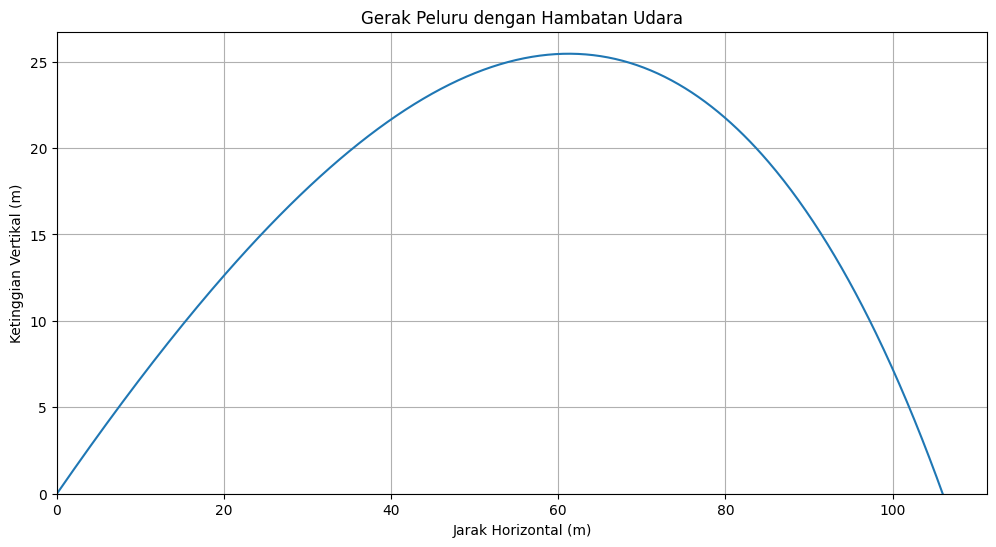

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x_air, y_air)
plt.title('Gerak Peluru dengan Hambatan Udara')
plt.xlabel('Jarak Horizontal (m)')
plt.ylabel('Ketinggian Vertikal (m)')
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [ ]:
data = {"Waktu (s)": [i * delta_t for i in range(len(x_air))],
        "X (m)": x_air,
        "Y (m)": y_air}

df2 = pd.DataFrame(data)
df2.to_excel("posisi_objek_2.xlsx", index=False)
df2

,Waktu (s),X (m),Y (m)
0,0.00,0.000000,0.000000
1,0.01,0.407801,0.284565
2,0.02,0.813845,0.566923
3,0.03,1.218148,0.847090
4,0.04,1.620728,1.125082
...,...,...,...
447,4.47,105.421064,0.771541
448,4.48,105.565159,0.581832
449,4.49,105.708956,0.391534
450,4.50,105.852456,0.200649


**Nomor 3:** Perbandingan Gerakan Proyektil Tanpa dan Dengan Hambatan Udara

In [ ]:
# Tanpa hambatan udara
def calculate_object1(v0, angle):
    g = 9.806
    angle_rad = np.radians(angle)

    v0x = v0 * np.cos(angle_rad)      # Persamaan (7)
    v0y = v0 * np.sin(angle_rad)      # Persamaan (8)

    # Tinggi maksimum
    h = (v0y**2) / (2 * g)

    # Waktu terbang total
    t_flight = 2 * v0y / g

    # Jarak jangkauan
    R = v0x * t_flight

    return h, R

In [ ]:
# Dengan hambatan udara
def calculate_object2(v0, angle, massa, D, delta_t):

    # Panggil fungsi untuk menghitung posisi objek
    x, y = object_position2(v0, angle, massa, D, delta_t)

    # Tinggi maksimum
    h = max(y)

    # Jarak jangkauan
    R = x[-1]

    return h, R

In [ ]:
# Parameter Definition
v0      = 50      # Kecepatan awal (m/s)
angle   = 35      # Sudut luncuran (derajat)
delta_t = 0.01    # Langkah waktu (s)
massa   = 0.15    # Massa (kg)
D       = 0.0013  # Konstanta hambatan

In [ ]:
# Menghitung tinggi maksimum dan jarak jangkauan tanpa hambatan udara
max_height_no_air, range_no_air = calculate_object1(v0, angle)

# Menghitung tinggi maksimum dan jarak jangkauan dengan hambatan udara
max_height_air, range_air = calculate_object2(v0, angle, massa, D, delta_t)

print(f"Tanpa hambatan udara : Tinggi Maksimum (h) = {max_height_no_air:.2f} m, Jarak Jangkauan (R) = {range_no_air:.2f} m")
print(f"Dengan hambatan udara: Tinggi Maksimum (h) = {max_height_air:.2f} m, Jarak Jangkauan (R) = {range_air:.2f} m")

Tanpa hambatan udara : Tinggi Maksimum (h) = 41.94 m, Jarak Jangkauan (R) = 239.57 m
Dengan hambatan udara: Tinggi Maksimum (h) = 25.45 m, Jarak Jangkauan (R) = 106.00 m
